[View in Colaboratory](https://colab.research.google.com/github/MaharshiYeluri01/MachineLearningProjects/blob/master/AutoEncoders_PCA.ipynb)

# Dimensionality Reduction with AutoEncoders

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files

In [0]:

uploaded = files.upload()

In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "anonymized_data.csv" with length 284033 bytes


In [0]:
import pandas as pd
df= pd.read_csv('anonymized_data.csv')

In [0]:
df.head()

In [0]:
data=df.drop('Label',axis=1)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(data)

In [0]:
inputs=scaled_data.shape[1]

In [0]:
X= tf.placeholder(tf.float32,shape=[None,inputs])

In [0]:
from tensorflow.contrib.layers import fully_connected

In [0]:
num_hidden=2
num_outs=inputs

In [0]:
hidden = fully_connected(X,num_hidden,activation_fn=None)

In [0]:
outputs=fully_connected(hidden,num_outs,activation_fn=None)

In [0]:
loss = tf.reduce_mean(tf.square(outputs-X))
optimizer=tf.train.AdamOptimizer(learning_rate=0.001)
train= optimizer.minimize(loss)

In [0]:
init=tf.global_variables_initializer()

In [50]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(10000):
    sess.run(train,feed_dict={X:scaled_data})
    if epoch%1000==0:
      print(str(epoch)+"epochs Compleated")

0 Compleated
1000 Compleated
2000 Compleated
3000 Compleated
4000 Compleated
5000 Compleated
6000 Compleated
7000 Compleated
8000 Compleated
9000 Compleated


In [0]:
with tf.Session() as sess:
  sess.run(init)
  output_2d = hidden.eval(feed_dict={X: scaled_data})

In [52]:
output_2d.shape

(500, 2)

In [0]:
dim1=output_2d[:,0]

In [0]:
dim2=output_2d[:,1]

In [0]:
dim1

In [0]:
dim2

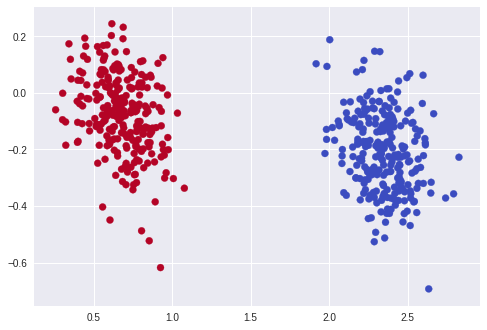

In [55]:
plt.scatter(dim1,dim2,c=df["Label"],cmap='coolwarm')